In [1]:
! pip install pandas seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
file_path = "~/workspace/ME_592_Assignment1/energydata_complete.csv"
df = pd.read_csv(file_path, parse_dates=["date"], index_col="date")

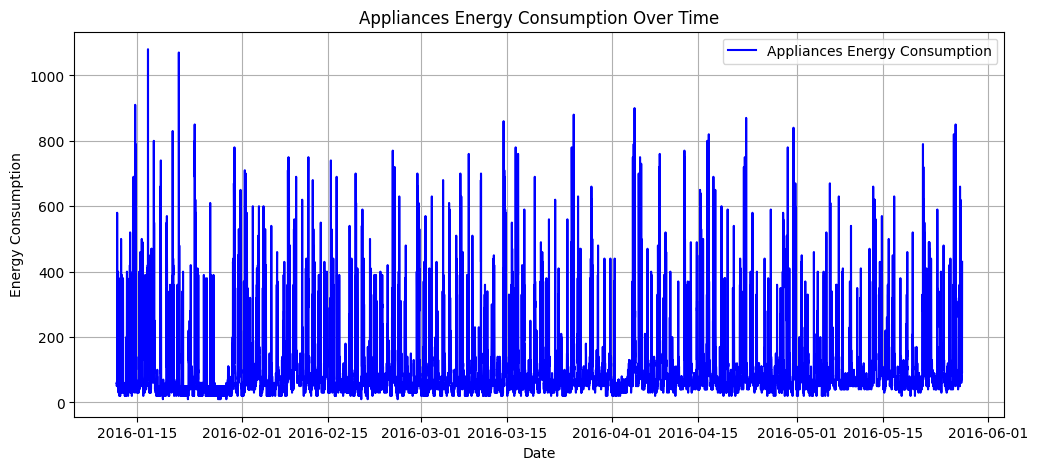

In [4]:
# Plot energy consumption for the entire period
plt.figure(figsize=(12, 5))
plt.plot(df.index, df["Appliances"], label="Appliances Energy Consumption", color="blue")
plt.xlabel("Date")
plt.ylabel("Energy Consumption")
plt.title("Appliances Energy Consumption Over Time")
plt.legend()
plt.grid(True)
plt.show()

(1152, 28)


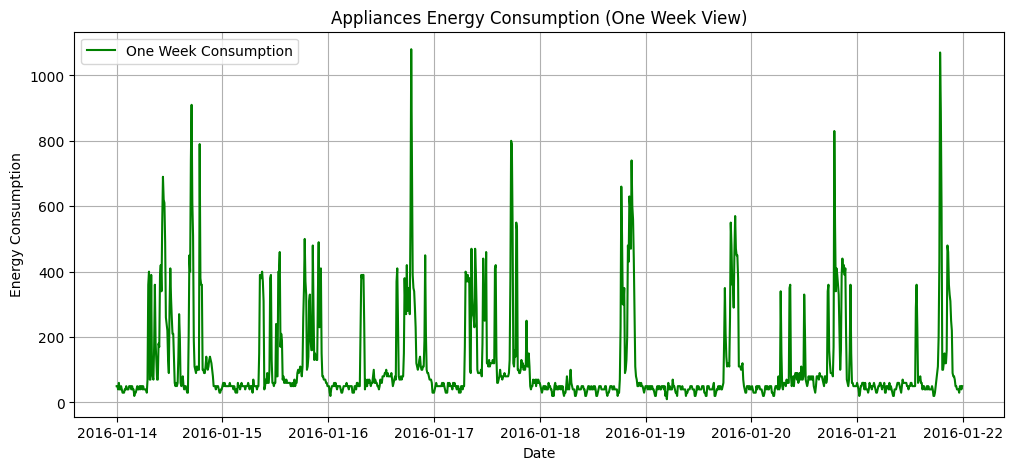

In [5]:
import seaborn as sns
# Select one week's data
one_week_data = df.loc["2016-01-14":"2016-01-21"]
print(one_week_data.shape)
# Plot energy consumption for one week
plt.figure(figsize=(12, 5))
plt.plot(one_week_data.index, one_week_data["Appliances"], label="One Week Consumption", color="green")
plt.xlabel("Date")
plt.ylabel("Energy Consumption")
plt.title("Appliances Energy Consumption (One Week View)")
plt.legend()
plt.grid(True)
plt.show()

In [6]:
# Select one week's data (January 17-13, 2016)
start_date = "2016-01-17"
end_date = "2016-01-23"
df_week = df.loc[start_date:end_date].copy()
# df_week['date'] = pd.to_datetime(df_week['date'])

In [7]:
df_week["Appliances"].max()

np.int64(1070)

In [8]:
# Reshape data for heatmap: Hourly consumption for each day of the week
df_week['hour'] = df_week.index.hour
df_week['day'] = df_week.index.date
df_week['day_name'] = pd.to_datetime(df_week['day']).dt.day_name()


In [9]:
days_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
df_week['day_name'] = pd.Categorical(df_week['day_name'], categories=days_order, ordered=True)
pivot_table = df_week.pivot_table(values='Appliances', index='hour', columns='day_name', aggfunc='sum', observed=False)

In [10]:
# pivot_table = pivot_table.iloc[::-1]

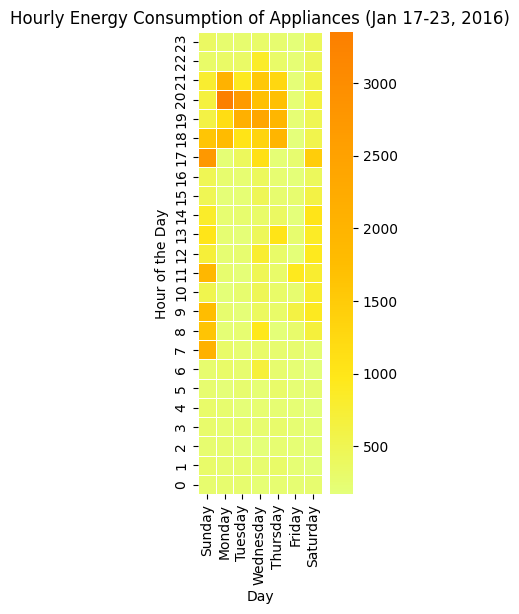

In [11]:
plt.figure(figsize=(2, 6))
sns.heatmap(pivot_table, cmap="Wistia", annot=False, fmt=".1f", linewidth=0.5)
plt.title("Hourly Energy Consumption of Appliances (Jan 17-23, 2016)")
plt.xlabel("Day")
plt.ylabel("Hour of the Day")
plt.gca().invert_yaxis()
plt.show()

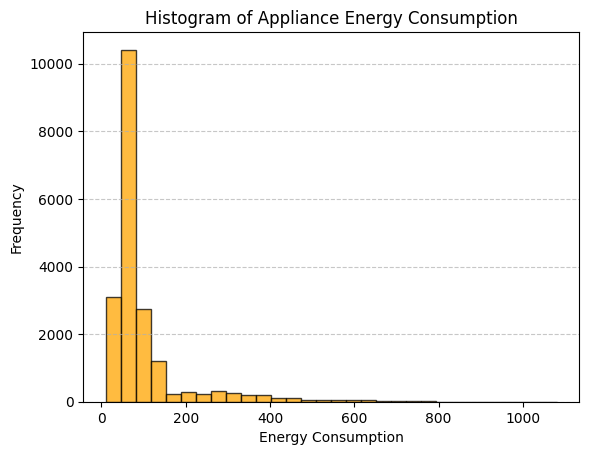

In [12]:
plt.hist(df['Appliances'], bins=30, color="orange", edgecolor="black", alpha=0.75)

# Labels and title
plt.xlabel("Energy Consumption")
plt.ylabel("Frequency")
plt.title("Histogram of Appliance Energy Consumption")

# Show the grid for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

In [13]:
df.index = pd.to_datetime(df.index)

In [14]:
df['NSM'] = df.index.hour * 3600 + df.index.minute * 60 + df.index.second

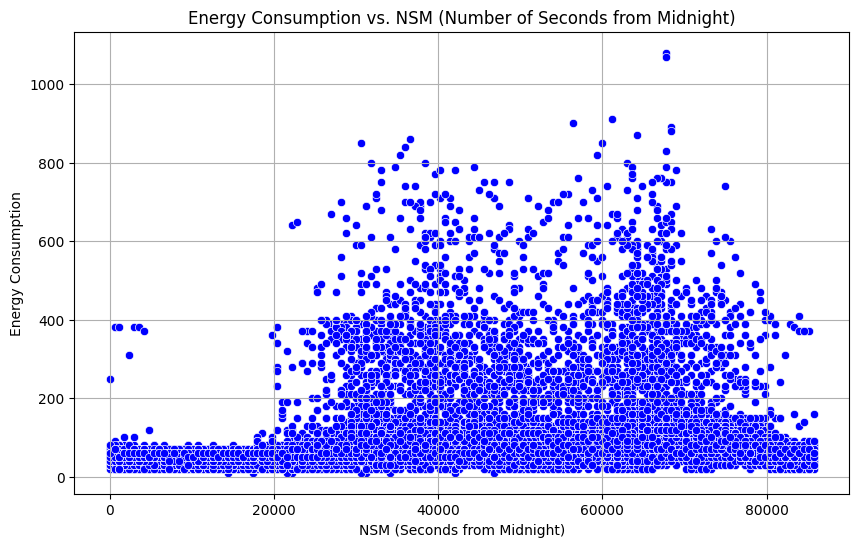

In [15]:
# Plot energy consumption vs. NSM
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NSM', y='Appliances', data=df, color='blue')
plt.title('Energy Consumption vs. NSM (Number of Seconds from Midnight)')
plt.xlabel('NSM (Seconds from Midnight)')
plt.ylabel('Energy Consumption')
plt.grid(True)
plt.show()

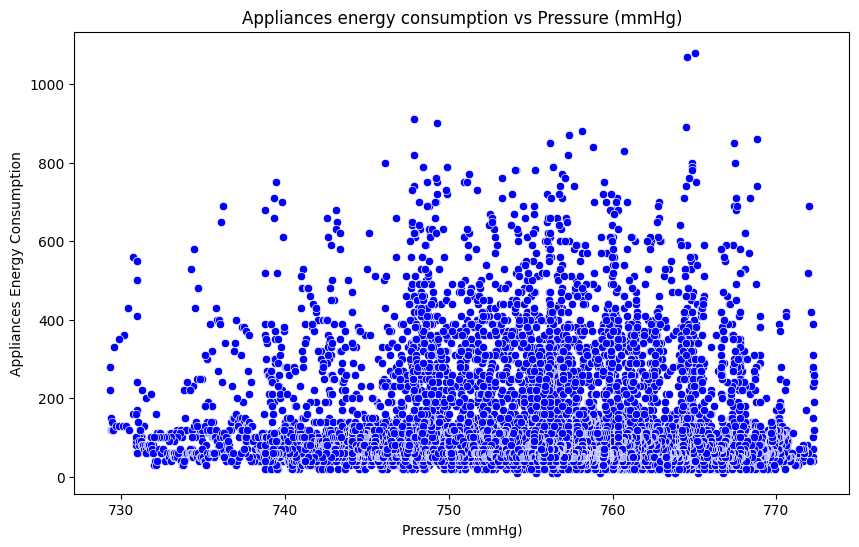

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Press_mm_hg', y='Appliances', data=df, color='blue')
plt.title('Appliances energy consumption vs Pressure (mmHg)')
plt.xlabel('Pressure (mmHg)')
plt.ylabel('Appliances Energy Consumption')
plt.show()

Text(0.5, 0, 'Time (seconds)')

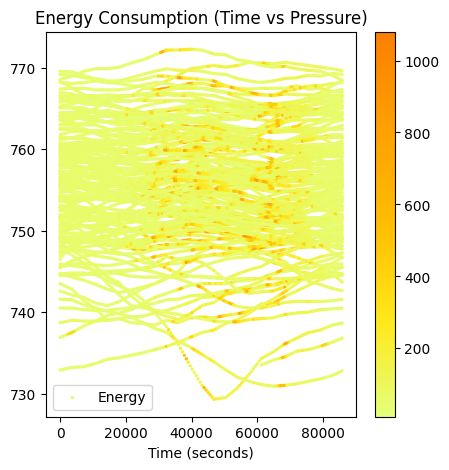

In [20]:
# NSM vs Press_mm_hg
plt.figure(figsize=(5, 5))
plt.scatter(df['NSM'], df['Press_mm_hg'], s=2, c=df['Appliances'], cmap='Wistia')
plt.colorbar()
plt.legend(['Energy'])
plt.title('Energy Consumption (Time vs Pressure)')
plt.xlabel('Time (seconds)')

In [19]:
df.corr()['Appliances'].sort_values(ascending=False)

Appliances     1.000000
NSM            0.217152
lights         0.197278
T2             0.120073
T6             0.117638
T_out          0.099155
Windspeed      0.087122
RH_1           0.086031
T3             0.085060
T1             0.055447
T4             0.040281
T8             0.039572
RH_3           0.036292
T7             0.025801
T5             0.019760
RH_4           0.016965
Tdewpoint      0.015353
T9             0.010010
RH_5           0.006955
Visibility     0.000230
rv1           -0.011145
rv2           -0.011145
Press_mm_hg   -0.034885
RH_9          -0.051462
RH_7          -0.055642
RH_2          -0.060465
RH_6          -0.083178
RH_8          -0.094039
RH_out        -0.152282
Name: Appliances, dtype: float64

The NSM exhibits the strongest linear correlation with appliance energy consumption, indicating a significant relationship between energy usage and the time of day. Appliance energy consumption begins to rise after 5 AM, reaching its peak between 5 PM and 8 PM, after which it gradually declines. This pattern suggests that occupants in the building are more active in using appliances during the evening hours. On the other hand, while pressure might have a nonlinear relationship with energy consumption, it demonstrates a weak negative correlation. It is important to note that while a strong correlation highlights a potential association, it does not imply causation, and a weak correlation does not necessarily mean the variables are independent of each other.